# Thuộc  tính  đặc  trưng  của  07  loại  hạt  đậu  từ  các  vùng  khác  nhau  được  cho  trong  tệp  Dry_Bean_Dataset.csv. Trong các trường thông tin, cột Area (cột đầu tiên) là chỉ số vùng của hạt đậu, cũng như diện tích vùng hạt đậu trên ảnh, tính theo pixel. Các cột còn lại (16) – trừ cột cuối cùng, đều chứa dữ  liệu số đặc trưng cho các thuộc tính của hạt đậu. Cột cuối cùng chứa tên của các loại đậu tương ứng. Toàn bộ dữ liệu có 13611 mẫu.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltspecies

In [2]:
data = pd.read_csv("E:\\ML\\ANN\\Dry_Bean_Dataset.csv")
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


# Giảm dữ liệu xuống còn 2 hoặc 3 chiều, hiển thị trực quan dữ liệu để có thể quan sát phân bố của các loại hạt khác nhau.

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
# các features
X = data.iloc[:, :-1]

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Giảm chiều dữ liệu xuống 2 chiều
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

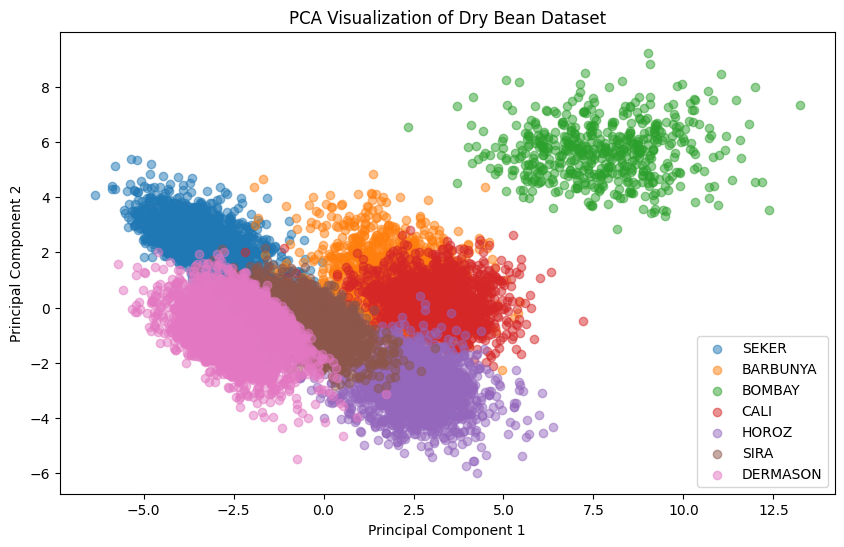

In [7]:
pc1 = - X_pca[:,0]
pc2 = - X_pca[:,1]

species = data.iloc[:, -1].values

# Tạo DataFrame mới từ dữ liệu giảm chiều
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Thêm cột loại đậu vào DataFrame mới
pca_df['Type'] = species

# Trực quan phân phối của các loại đậu trên không gian mới
plt.figure(figsize=(10, 6))
for bean_type in pca_df['Type'].unique():
    plt.scatter(pca_df.loc[pca_df['Type'] == bean_type, 'PC1'],
                pca_df.loc[pca_df['Type'] == bean_type, 'PC2'],
                label=bean_type, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Dry Bean Dataset')
plt.legend()
plt.show()

# Chia dữ liệu thành 2 tập train:test

In [8]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập train:validion với tỉ lệ  7:3
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

## Sử dụng Naives Bayes để phân loại, đánh giá accuracy và giải thiích kết quả

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

# Đánh giá trên tập train và tập validation
from  sklearn.metrics import classification_report

y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))

# Đánh giá mô hình trên tập val
y_pred = model.predict(X_val)
print("Validation set")
print(classification_report(y_val, y_pred))

##   Mô hình Naïve Bayes hoạt động khá tốt và cho ra kết quả ổn định trên tập train và validation với độ chính xác là tương đuơng nhau khoảng 0.76 - 0.77. 

## Nguyên nhân: Mô hình Naive Bayes hoạt động dựa trên giả thiết sự độc lập giữa các features, nên việc giảm chiều không làm ảnh hưởng nhiều đến hiệu suất của mô hình

## Phân loai bằng Multinomial Logistic Regression

In [12]:
# Phân loại bằng phương pháp Multinomial Logistic Regression. Đánh giá độ chính xác của mô  hình trên các độ đo Precision, Recall và Accuracy. Giải thích kết quả và ý nghĩa của các hệ số thu được từ mô hình. 

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

E:\ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [13]:
# Đánh giá mô hình trên tập train
y_pred = model.predict(X_train)
print("Train set")
print(classification_report(y_train, y_pred))

Train set
              precision    recall  f1-score   support

    BARBUNYA       0.88      0.82      0.85       933
      BOMBAY       1.00      1.00      1.00       388
        CALI       0.88      0.90      0.89      1129
    DERMASON       0.87      0.88      0.87      2489
       HOROZ       0.89      0.88      0.88      1334
       SEKER       0.88      0.84      0.86      1448
        SIRA       0.80      0.84      0.82      1806

    accuracy                           0.87      9527
   macro avg       0.89      0.88      0.88      9527
weighted avg       0.87      0.87      0.87      9527


# Đánh giá mô hình trên tập validation
y_pred = model.predict(X_val)
print("Validation set")
print(classification_report(y_val, y_pred))

## Nhận xét: Mô hình Multinomial hoạt động tốt và ổn định trên cả hai tập validation và tập train

## Mô hình có khả năng phân loại tốt

## Xây dựng một mô hình ANN với 01 tầng ẩn (ngoại trừ đầu vào và đầu ra), số chiều của tầng ẩn là 32, đầu ra sử dụng dạng hàm loss và phân loại phù hợp. Sử dụng mô hình này để phân loại dữ liệu nói trên. Đánh giá độ chính xác của mô hình trên các độ đo Precision, Recall và Accuracy. Giải thích kết quả.

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('Dry_Bean_Dataset.csv')

# Tách đặc trưng và nhãn
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Chuyển đổi nhãn thành dạng số
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Chia dữ liệu thành tập train và tập validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Chuyển đổi nhãn thành dạng one-hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

# Xây dựng mô hình ANN
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Biên dịch mô hình
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

E:\ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5050 - loss: 1.3119
Epoch 2/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8992 - loss: 0.4104
Epoch 3/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9115 - loss: 0.2708
Epoch 4/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9177 - loss: 0.2420
Epoch 5/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9253 - loss: 0.2205
Epoch 6/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.9212 - loss: 0.2250
Epoch 7/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - accuracy: 0.9256 - loss: 0.2068
Epoch 8/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9225 - loss: 0.2093
Epoch 9/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.9251 - loss: 0.2041
Epoch 10/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.9266 - loss: 0.1976


In [21]:
# Đánh giá mô hình trên tập train
y_pred = model.predict(X_train)
y_pred = label_encoder.inverse_transform(y_pred.argmax(axis=1))
y_train = label_encoder.inverse_transform(y_train.argmax(axis=1))
print("Train set")
print(classification_report(y_train, y_pred))

298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Train set
              precision    recall  f1-score   support

    BARBUNYA       0.96      0.92      0.94       933
      BOMBAY       1.00      1.00      1.00       388
        CALI       0.92      0.96      0.94      1129
    DERMASON       0.92      0.92      0.92      2489
       HOROZ       0.96      0.94      0.95      1334
       SEKER       0.94      0.96      0.95      1448
        SIRA       0.87      0.87      0.87      1806

    accuracy                           0.93      9527
   macro avg       0.94      0.94      0.94      9527
weighted avg       0.93      0.93      0.93      9527


In [22]:
# Đánh giá mô hình trên tập validation
y_pred = model.predict(X_val)
y_pred = label_encoder.inverse_transform(y_pred.argmax(axis=1))
y_val = label_encoder.inverse_transform(y_val.argmax(axis=1))
print("Validation set")
print(classification_report(y_val, y_pred))

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Validation set
              precision    recall  f1-score   support

    BARBUNYA       0.95      0.88      0.91       389
      BOMBAY       1.00      0.99      1.00       134
        CALI       0.91      0.96      0.93       501
    DERMASON       0.92      0.93      0.92      1057
       HOROZ       0.97      0.96      0.96       594
       SEKER       0.94      0.95      0.95       579
        SIRA       0.88      0.87      0.88       830

    accuracy                           0.92      4084
   macro avg       0.94      0.93      0.94      4084
weighted avg       0.93      0.92      0.92      4084


## Nhận xét: mô hình ANN cho độ chính xác tốt trên cả 2 tập dữ liệu

## Precison và recall của mô hình ổn định, cao -> có khả năng phân loại tốt

# Giảm chiều dữ liệu còn 4 chiều

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Giảm dữ liệu xuống còn 4 chiều
pca = PCA(n_components=4)
X = StandardScaler().fit_transform(X)
X = pca.fit_transform(X)

# Chia dữ liệu thành tập train và tập validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

## Naive Bayes

In [24]:
# Phân loại bằng phương pháp Naïve Bayes phù hợp. Đánh giá độ chính xác của mô hình trên các độ đo Precision, Recall và Accuracy. Giải thích kết quả.
model = GaussianNB()
model.fit(X_train, y_train)

# Đánh giá mô hình trên tập train
y_pred = model.predict(X_train)
print("Train set")
print(classification_report(y_train, y_pred))

# Đánh giá mô hình trên tập validation
y_pred = model.predict(X_val)
print("Validation set")
print(classification_report(y_val, y_pred))

Train set
              precision    recall  f1-score   support

    BARBUNYA       0.81      0.66      0.73       933
      BOMBAY       1.00      1.00      1.00       388
        CALI       0.79      0.85      0.82      1129
    DERMASON       0.88      0.87      0.88      2489
       HOROZ       0.91      0.95      0.93      1334
       SEKER       0.94      0.93      0.93      1448
        SIRA       0.80      0.82      0.81      1806

    accuracy                           0.86      9527
   macro avg       0.87      0.87      0.87      9527
weighted avg       0.86      0.86      0.86      9527

Validation set
              precision    recall  f1-score   support

    BARBUNYA       0.76      0.67      0.71       389
      BOMBAY       1.00      1.00      1.00       134
        CALI       0.82      0.84      0.83       501
    DERMASON       0.88      0.90      0.89      1057
       HOROZ       0.90      0.96      0.93       594
       SEKER       0.92      0.91      0.92       579

## Nhận xét: Độ chính xác của Naive Bayes trên cả 2 tập đều gần nhau, xấp xỉ 0.86 và 0.87
## Tuy nhiên precision và recall có sự chênh lệnh
## Việc giảm chiều dữ liệu hợp lý giúp Naive Bayes loại bỏ được những sự phụ thuộc tuyến tính giữa các chiều dữ liệu, từ đó học hiệu quả hơn

## Multinomial Logistic Regression

# Phân loại bằng phương pháp Multinomial Logistic Regression. Đánh giá độ chính xác của mô hình trên các độ đo Precision, Recall và Accuracy. Giải thích kết quả và ý nghĩa của các hệ số thu được từ mô hình. 
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Đánh giá mô hình trên tập train
y_pred = model.predict(X_train)
print("Train set")
print(classification_report(y_train, y_pred))

# Đánh giá mô hình trên tập validation
y_pred = model.predict(X_val)   
print("Validation set")
print(classification_report(y_val, y_pred))

## Moo hình vẫn có độ chính xác cao và ổn định giữa 2 tập train và validation

## Mô hình dự đoán phân loại các class khá ổn định và chính xác

## ANN

In [26]:
# Xây dựng một mô hình ANN với 01 tầng ẩn (ngoại trừ đầu vào và đầu ra), số chiều của tầng ẩn là 32, đầu ra sử dụng dạng hàm loss và phân loại phù hợp. Sử dụng mô hình này để phân loại dữ liệu nói trên. Đánh giá độ chính xác của mô hình trên các độ đo Precision, Recall và Accuracy. Giải thích kết quả.

# Tách đặc trưng và nhãn
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Chuyển đổi nhãn thành dạng số
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Giảm dữ liệu xuống còn 4 chiều
pca = PCA(n_components=4)
X = StandardScaler().fit_transform(X)
X = pca.fit_transform(X)

# Chia dữ liệu thành tập train và tập validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

# Chuyển đổi nhãn thành dạng one-hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

E:\ML\.venv\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4372 - loss: 1.6031
Epoch 2/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.8123 - loss: 0.5967
Epoch 3/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - accuracy: 0.8648 - loss: 0.4264
Epoch 4/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8779 - loss: 0.3599
Epoch 5/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8801 - loss: 0.3266
Epoch 6/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8862 - loss: 0.3204  
Epoch 7/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 866us/step - accuracy: 0.8848 - loss: 0.3070
Epoch 8/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - accuracy: 0.8895 - loss: 0.2939
Epoch 9/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8910 - loss: 0.2891
Epoch 10/10
298/298 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.8879 - loss: 0.2934


In [27]:
# Đánh giá mô hình trên tập train
y_pred = model.predict(X_train)
y_pred = label_encoder.inverse_transform(y_pred.argmax(axis=1))
y_train = label_encoder.inverse_transform(y_train.argmax(axis=1))
print("Train set")
print(classification_report(y_train, y_pred))

# Đánh giá mô hình trên tập validation
y_pred = model.predict(X_val)
y_pred = label_encoder.inverse_transform(y_pred.argmax(axis=1))
y_val = label_encoder.inverse_transform(y_val.argmax(axis=1))
print("Validation set")
print(classification_report(y_val, y_pred))

298/298 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Train set
              precision    recall  f1-score   support

    BARBUNYA       0.80      0.73      0.77       933
      BOMBAY       0.99      0.99      0.99       388
        CALI       0.82      0.84      0.83      1129
    DERMASON       0.92      0.91      0.91      2489
       HOROZ       0.95      0.95      0.95      1334
       SEKER       0.95      0.94      0.94      1448
        SIRA       0.83      0.87      0.85      1806

    accuracy                           0.89      9527
   macro avg       0.89      0.89      0.89      9527
weighted avg       0.89      0.89      0.89      9527
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step
Validation set
              precision    recall  f1-score   support

    BARBUNYA       0.78      0.76      0.77       389
      BOMBAY       1.00      0.99      0.99       134
        CALI       0.85      0.82      0.84       501
    DERMASON       0.92      0.92      0.92      1057
       HOROZ       0.93 

## Mô hình hoạt động tốt và ổn định
## Việc giảm chiều dữ liệu làm cho độ chính xác giảm đi

# Kết luận: Naive Bayes hoạt động dựa trên giả thiết sự độc lập giữa các chiều dữ liệu -> bị ảnh hưởng nhiều khi thực hiện giảm chieefu